# Polynomial Regression

This notebook contains an example of how to use ploynomial regression.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from data_util import *

# Read in data
df = pd.read_csv('./batting-angles-distances.csv')
df.head()

,Angle,Distance
0,34,253.934210
1,33,270.378070
2,70,158.648806
3,54,234.594933
4,26,250.652104


### Look at linear vs. quadratic fit

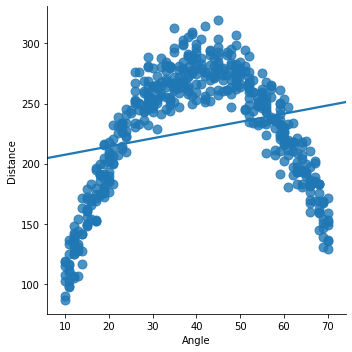

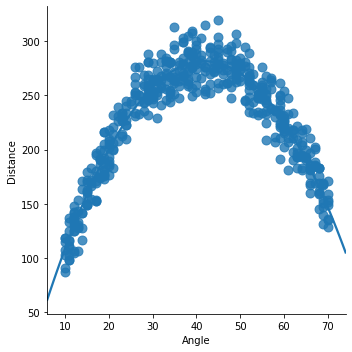

In [7]:
pt1 = sns.lmplot(x="Angle", y="Distance", data=df, order=1, ci=None, scatter_kws={'s':80})
pt2 = sns.lmplot(x="Angle", y="Distance", data=df, order=2, ci=None, scatter_kws={'s':80})
plt.show()

### Build the model

In [8]:
# Get x and y data
data_x = df[['Angle']]
data_y = df['Distance']

# Build a quadratic transform function.
quad = PolynomialFeatures(degree=2)

# Transform the x data into quadratic data.
data_x2 = quad.fit_transform(data_x)

### Fit 1: Linear fit

In [9]:
x_train, x_test, y_train, y_test = train_test_split(data_x, data_y, 
                                                    test_size=0.2, random_state=4)
linear_mod = linear_model.LinearRegression()

# Fit the model.
linear_mod.fit(x_train, y_train)

# Make predictions
preds = linear_mod.predict(x_test)

# Look at results:
print_regression_error_report(y_test, preds)

MSE, MAE, R^2, EVS: [3233.8398057597906, 43.785030483449844, 0.005364757505538886, 0.08447669465740837]


### Fit 2: Quadratic fit

In [10]:
x_train, x_test, y_train, y_test = train_test_split(data_x2, data_y,
                                                   test_size=0.2, random_state=4)
quad_mod = linear_model.LinearRegression()
quad_mod.fit(x_train, y_train)
preds = quad_mod.predict(x_test)
print_regression_error_report(y_test, preds)

MSE, MAE, R^2, EVS: [226.82140855446963, 10.04539228545903, 0.9302363195917479, 0.9307178636004925]
